<img src='../img/dust_banner.png' alt='Training school and workshop on dust' align='center' width='100%'></img>

<br>

# EARLINET Lidar backscatter profiles

### About

The [European Aerosol Research Lidar Network (EARLINET)](https://www.earlinet.org/index.php?id=earlinet_homepage), was established in 2000 as a research project with the goal of creating a quantitative, comprehensive, and statistically significant database for the horizontal, vertical, and temporal distribution of aerosols on a continental scale. Since then EARLINET has continued to provide the most extensive collection of ground-based data for the aerosol vertical distribution over Europe.

Atmospheric aerosols are considered one of the major uncertainties in climate forcing, and a detailed aerosol characterization is needed in order to understand their role in the atmospheric processes as well as human health and environment. The most significant source of uncertainty is the large variability in space and time. Due to their short lifetime and strong interactions, their global concentrations and properties are poorly known. For these reasons, information on the large-scale three-dimensional aerosol distribution in the atmosphere should be continuously monitored. It is undoubted that information on the vertical distribution is particularly important and that lidar remote sensing is the most appropriate tool for providing this information. 

EARLINET offers access to `long-term multi-wavelength backscatter and extinction coefficient profiles` via an easily accessible database, covering the European continent. See [here](https://www.earlinet.org/index.php?id=105) an overview of the EARLINET Lidar Stations.

### Basic Facts

> **Spatial coverage**: `Observation stations in Europe` <br>
> **Temporal resolution**:  `sub-hourly` <br>
> **Temporal coverage**: `since 2000` <br>
> **Data format**: `NetCDF` <br>
> **Versions**: `Level 1 (basic quality control)`, `Level 2 (advanced quality control)`, `Level 3 (climatological aggregated products)`


### How to access the data

EARLINET data are available in `netCDF` and can be accessed via the [EARLINET Database](https://www.earlinet.org/index.php?id=125). Data are offered on different quality controlled levels:
* `Level 1`: Basic quality control 
* `Level 2`: Advanced quality control, and 
* `Level 3`: Climatological aggregated products 

You have to [register for the EARLINET Data Portal](https://data.earlinet.org/earlinet/userRegistration.zul) in order to be able to download EARLINET data.

### Module outline
* [1 - Load and browse EARLINET data with xarray](#load_browse_earlinet)
* [2 - Visualize the backscatter profile of the station in Ispra on 23 February 2021](#visualize_earlinet)
* [3 - Load and visualize the backscatter profiles in Ispra for 24+25 February 2021](#visualize_continue)

<hr>

#### Load libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from netCDF4 import Dataset
import xarray as xr

<hr>

### <a id='load_browse_earlinet'></a> 1.Load and browse EARLINET data with xarray

EARLINET data are disseminated as hourly files in the `NetCDF` format. You can use the Python package [xarray](http://xarray.pydata.org/en/stable/) and the function `open_mfdataset()` to open multiple `NetCDF` at once. Let us load the data files for the EARLINET station Ispra, Italy for 23 February 2021.

The function loads the data as `Dataset`, which is a collection of multiple data variables that share the same coordinate information. Below, you see that the EARLINET data have four dimensions: `altitude`, `time`, `nv` and `wavelength`.

The data also hold 27 data variables, including a variable `backscatter`, which is the variable of interest for us.

In [19]:
file_dir = '../data/2_observations/earlinet/Level2/ipr/0223/'
earlinet_2302 = xr.open_mfdataset(file_dir+'*')
earlinet_2302

<xarray.Dataset>
Dimensions:                                         (altitude: 128, time: 9, nv: 2, wavelength: 1)
Coordinates:
  * altitude                                        (altitude) float64 539.0 ...
  * time                                            (time) datetime64[ns] 202...
  * wavelength                                      (wavelength) float32 1.06...
    longitude                                       float32 8.617
    latitude                                        float32 45.82
Dimensions without coordinates: nv
Data variables: (12/27)
    time_bounds                                     (altitude, time, nv) datetime64[ns] dask.array<chunksize=(128, 1, 2), meta=np.ndarray>
    backscatter_calibration_value                   (altitude, time, wavelength) float32 dask.array<chunksize=(128, 1, 1), meta=np.ndarray>
    error_retrieval_method                          (altitude, time, wavelength) float32 dask.array<chunksize=(128, 1, 1), meta=np.ndarray>
    backscatter_evaluation_method                   (altitude, time, wavelength) float32 dask.array<chunksize=(128, 1, 1), meta=np.ndarray>
    backscatter_calibration_range_search_algorithm  (altitude, time, wavelength) float32 dask.array<chunksize=(128, 1, 1), meta=np.ndarray>
    elastic_backscatter_algorithm                   (altitude, time, wavelength) float32 dask.array<chunksize=(128, 1, 1), meta=np.ndarray>
    ...                                              ...
    user_defined_category                           (altitude, time) float64 ...
    backscatter_calibration_range                   (altitude, time, wavelength, nv) float32 dask.array<chunksize=(128, 1, 1, 2), meta=np.ndarray>
    backscatter_calibration_search_range            (altitude, time, wavelength, nv) float32 dask.array<chunksize=(128, 1, 1, 2), meta=np.ndarray>
    cloud_mask_type                                 (altitude, time) float64 ...
    scc_product_type                                (altitude, time) float64 ...
    cloud_mask                                      (time, altitude) float32 dask.array<chunksize=(1, 128), meta=np.ndarray>
Attributes: (12/35)
    Conventions:                          CF-1.7
    title:                                Profiles of aerosol optical properties
    source:                               Ground based LIDAR measurements
    references:                           Project website at http://www.earli...
    history:                              2021-10-06T09:21Z : Assigned versio...
    station_ID:                           ipr
    ...                                   ...
    scc_version_description:              SCC vers. 5.2.3 (HiRELPP vers. 1.1....
    processor_name:                       ELDA
    processor_version:                    3.4.8
    __file_format_version:                2.1
    input_file:                           ipr_003_0000753_202102231102_202102...
    overlap_correction_file:

EARLINET Lidar sensors create vertical profiles of the atmosphere. Let us inspect the variable `altitude` in order to see the resolution and extent of the vertical profile. You see that the EARLINET data offer measurements for every 40 meters from 539 m up to 8 km.

In [20]:
earlinet_2302.altitude

<xarray.DataArray 'altitude' (altitude: 128)>
array([ 539.,  599.,  659.,  719.,  779.,  839.,  899.,  959., 1019., 1079.,
       1139., 1199., 1259., 1319., 1379., 1439., 1499., 1559., 1619., 1679.,
       1739., 1799., 1859., 1919., 1979., 2039., 2099., 2159., 2219., 2279.,
       2339., 2399., 2459., 2519., 2579., 2639., 2699., 2759., 2819., 2879.,
       2939., 2999., 3059., 3119., 3179., 3239., 3299., 3359., 3419., 3479.,
       3539., 3599., 3659., 3719., 3779., 3839., 3899., 3959., 4019., 4079.,
       4139., 4199., 4259., 4319., 4379., 4439., 4499., 4559., 4619., 4679.,
       4739., 4799., 4859., 4919., 4979., 5039., 5099., 5159., 5219., 5279.,
       5339., 5399., 5459., 5519., 5579., 5639., 5699., 5759., 5819., 5879.,
       5939., 5999., 6059., 6119., 6179., 6239., 6299., 6359., 6419., 6479.,
       6539., 6599., 6659., 6719., 6779., 6839., 6899., 6959., 7019., 7079.,
       7139., 7199., 7259., 7319., 7379., 7439., 7499., 7559., 7619., 7679.,
       7739., 7799., 7859., 7919., 7979., 8039., 8099., 8159.])
Coordinates:
  * altitude   (altitude) float64 539.0 599.0 659.0 ... 8.099e+03 8.159e+03
    longitude  float32 8.617
    latitude   float32 45.82
Attributes:
    axis:           Z
    long_name:      height above sea level
    positive:       up
    standard_name:  altitude
    units:          m

As a last step before we can visualize the vertical profile, we can load the variable `backscatter` from the dataset. You can load a variable from a xarray.Dataset by adding the name of the variable in square brackets.

The loaded data array provides you additional attributes about the data, such as `long_name` and `units`.

In [21]:
backscatter = earlinet_2302['backscatter']
backscatter

<xarray.DataArray 'backscatter' (wavelength: 1, time: 9, altitude: 128)>
dask.array<concatenate, shape=(1, 9, 128), dtype=float64, chunksize=(1, 1, 128), chunktype=numpy.ndarray>
Coordinates:
  * altitude    (altitude) float64 539.0 599.0 659.0 ... 8.099e+03 8.159e+03
  * time        (time) datetime64[ns] 2021-02-23T11:02:16 ... 2021-02-23T19:4...
  * wavelength  (wavelength) float32 1.064e+03
    longitude   float32 8.617
    latitude    float32 45.82
Attributes:
    ancillary_variables:  error_backscatter vertical_resolution
    long_name:            aerosol backscatter coefficient
    plausibility:         parameter passed the EARLINET quality assurance.
    units:                m-1*sr-1

<br>

### <a id='visualize_earlinet'></a> 2. Visualize the backscatter profile of the station in Ispra on 23 February 2021

Now, we can already visualize the `Aerosol backscatter coefficient` for the station Ispra on 23 February 2021. We want to plot the time information on the x-axis and the altitude information on the y-axis. The visualization code below can be divided in five main parts:
* **Initiate a matplotlib figure**: Initiate a matplotlib plot and define the size of the plot
* **Plotting function**: plot the xarray.DataArray, but transpose the two dimensions, altitude and time
* **Set plot title, axes label and format axes tickes**: specify title, axes labels and their format
* **Define and format colorbar**: define and customize a colorbar
* **Add additional features**: such as grid lines


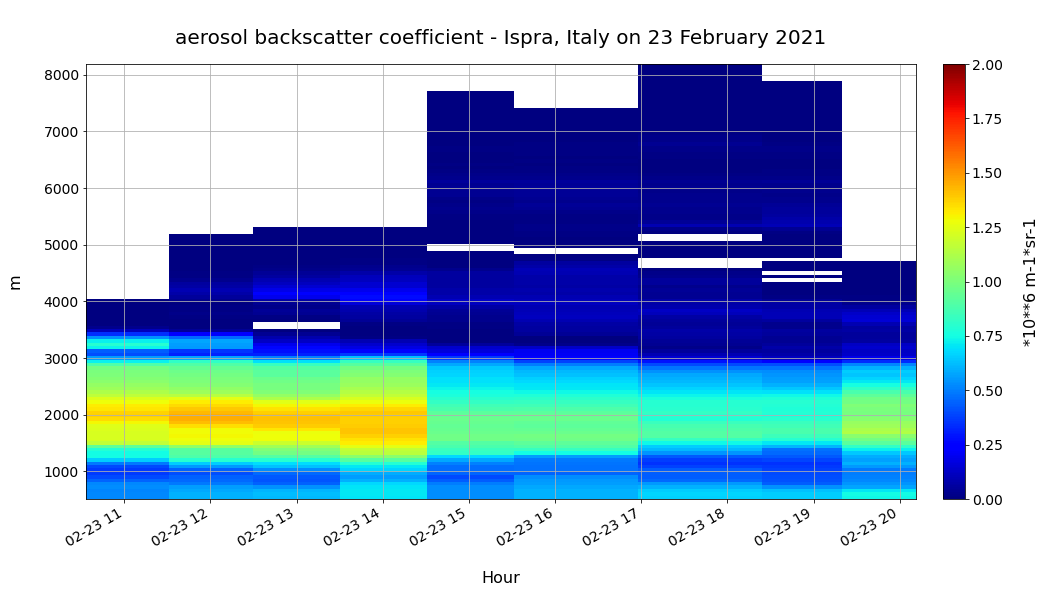

In [22]:
# Initiate a matplotlib figure
fig = plt.figure(figsize=(16,8))
ax=plt.axes()

# Plotting function
img = (backscatter*10**6).transpose().plot(vmin=0, 
                                             vmax=2, 
                                             cmap='jet', ax=ax, add_colorbar=False)

# Set title and axes label information
plt.title('\n' + backscatter.long_name + ' - Ispra, Italy on 23 February 2021', fontsize=20, pad=20)
plt.ylabel(earlinet_2302.altitude.units+'\n', fontsize=16)
plt.xlabel('\nHour', fontsize=16)

# Format the axes ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Define and format colorbar
cbar = fig.colorbar(img, ax=ax, orientation='vertical', fraction=0.04, pad=0.03)
cbar.set_label('\n*10**6 ' + backscatter.units, fontsize=16)
cbar.ax.tick_params(labelsize=14)

# Add additionally a legend and grid to the plot
plt.grid()

<br>

## <a id='visualize_continue'></a>3. Load and visualize the backscatter profiles in Ispra for 24+25 February 2021

Let us now also load the backscatter profiles for the station in Ispra for the two following days, 24th and 25th February 2021 respectively. We repeat the same steps as above. First, we load the backscatter profile information as xarray.Dataset with the function `open_mfdataset()`.

Once both datasets are loaded, you see that for 24 February backscatter profiles for four hours are available and for 25 February backscatter profiles for six hours are available.

In [23]:
file_dir = '../data/2_observations/earlinet/Level2/ipr/0224/'
earlinet_2402 = xr.open_mfdataset(file_dir+'*')

file_dir = '../data/2_observations/earlinet/Level2/ipr/0225/'
earlinet_2502 = xr.open_mfdataset(file_dir+'*')

earlinet_2402, earlinet_2502

(<xarray.Dataset>
 Dimensions:                                         (altitude: 82, time: 4, nv: 2, wavelength: 1)
 Coordinates:
   * altitude                                        (altitude) float64 539.0 ...
   * time                                            (time) datetime64[ns] 202...
   * wavelength                                      (wavelength) float32 1.06...
     longitude                                       float32 8.617
     latitude                                        float32 45.82
 Dimensions without coordinates: nv
 Data variables: (12/27)
     time_bounds                                     (altitude, time, nv) datetime64[ns] dask.array<chunksize=(82, 1, 2), meta=np.ndarray>
     backscatter_calibration_value                   (altitude, time, wavelength) float32 dask.array<chunksize=(82, 1, 1), meta=np.ndarray>
     error_retrieval_method                          (altitude, time, wavelength) float32 dask.array<chunksize=(82, 1, 1), meta=np.ndarray>
     back

<br>

The next step is now to visualize the two backscatter profiles for both days next to each other. We simply replicate the visualization code from above, but create two subplots with with `plt.subplot()`. By specifying `(1,2,1`), we create a plot with 1 row and 2 columns and the third number indicates that this is the first plot of two.

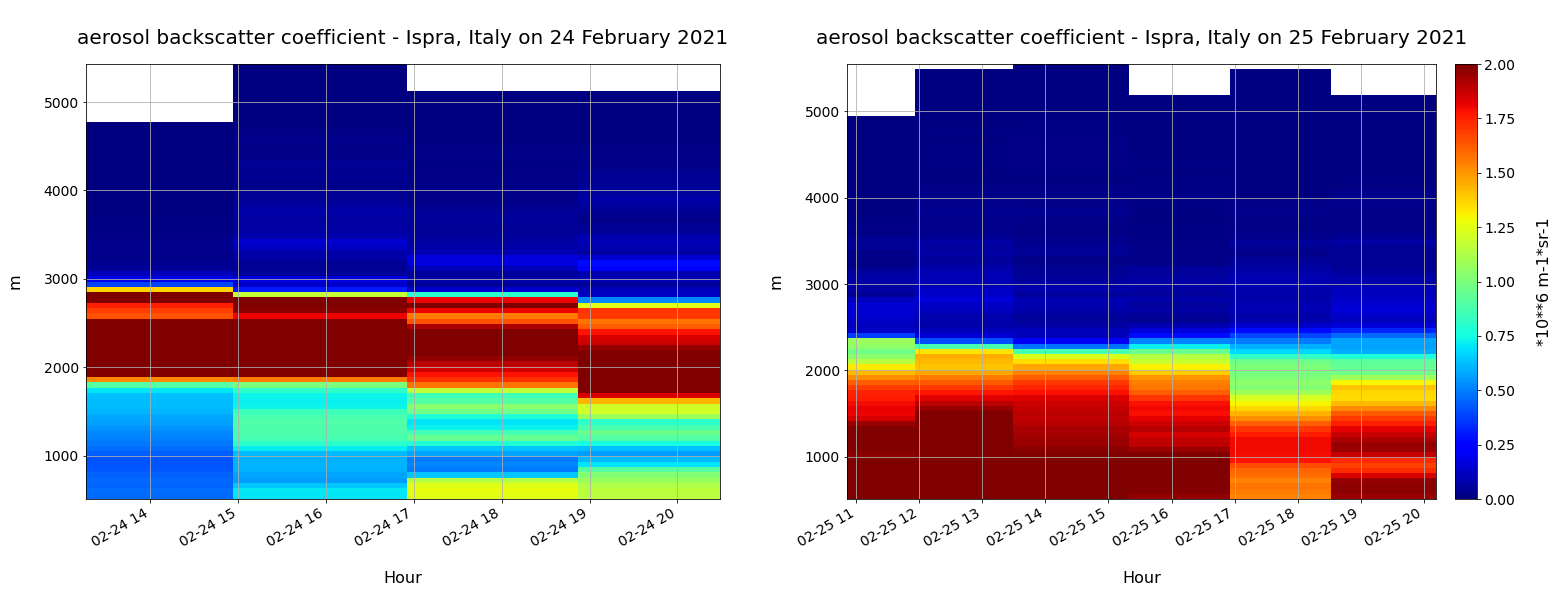

In [46]:
# Initiate a matplotlib figure
fig = plt.figure(figsize=(25,8))

########################
# 1st subplot
########################
ax1=plt.subplot(1,2,1)

# Plotting function
img1 = (earlinet_2402['backscatter']*10**6).transpose().plot(vmin=0, 
                                             vmax=2, 
                                             cmap='jet', ax=ax1, add_colorbar=False)

# Set title and axes label information
plt.title('\n' + earlinet_2402['backscatter'].long_name + ' - Ispra, Italy on 24 February 2021', fontsize=20, pad=20)
plt.ylabel(earlinet_2402.altitude.units+'\n', fontsize=16)
plt.xlabel('\nHour', fontsize=16)

# Format the axes ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add additionally a legend and grid to the plot
plt.grid()


########################
# 2nd subplot
########################
ax2 = plt.subplot(1,2,2)
# Plotting function
img2 = (earlinet_2502['backscatter']*10**6).transpose().plot(vmin=0, 
                                             vmax=2, 
                                             cmap='jet', ax=ax2, add_colorbar=False)

# Set title and axes label information
plt.title('\n' + earlinet_2502['backscatter'].long_name + ' - Ispra, Italy on 25 February 2021', fontsize=20, pad=20)
plt.ylabel(earlinet_2502.altitude.units+'\n', fontsize=16)
plt.xlabel('\nHour', fontsize=16)

# Format the axes ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Define and format colorbar
cbar = fig.colorbar(img2, ax=ax2, orientation='vertical', fraction=0.04, pad=0.03)
cbar.set_label('\n*10**6 ' + earlinet_2502['backscatter'].units, fontsize=16)
cbar.ax.tick_params(labelsize=14)

# Add additionally a legend and grid to the plot
plt.grid()


<br>

Above, you see that the intensity of the backscatter profile has increased from 23rd to 24th of February, but the aerosol layer was in the upper atmosphere between 2000 and 3000 m above surface. On 25th February, the aerosol layer settled at the surface. This strong aerosol occurence at the surface can also be seen in the [EEA Air Qualty data](./23_EEA_Air_Quality.ipynb#visualize_eea), as the PM10 value exceeded by far the daily limit of 50 µg/m3.

<hr>

<img src='../img/copernicus_logo.png' alt='Logo EU Copernicus' align='right' width='20%'><br><br><br><br>
<p style="text-align:right;">This project is licensed under the <a href="./LICENSE">MIT License</a> and is developed under a Copernicus contract.